In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class KNN:
    def __init__(self, k: int):
        self.k = k
        
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """
            x.shape = (N, M)
            y.shape = (N)
        """
        self.x = x_train.reshape((len(x_train), -1))
        self.labels = y_train.reshape(len(y_train))
        self.unique_labels = np.unique(self.labels)
        
    def predict_one(self, x_sample: np.ndarray):
        distances = np.sum([(self.x[:, i] - x_sample[i]) ** 2 for i in range(len(x_sample))], axis=0)
        data = np.transpose([distances, self.labels])  
        near_labels = np.array(sorted(data, key= lambda x: x[0])[:self.k])
        label_2_number = {}
        for lbl in self.unique_labels:
            label_2_number[lbl] = np.sum(near_labels[:, 1] == lbl)
        label_2_number_sorted = sorted(label_2_number.items(), key=lambda x: x[1])
        return label_2_number_sorted[-1][0]
        
        
    def predict(self, _x_test):
        x_test = _x_test.reshape((len(_x_test), -1))
        assert len(x_test.shape) == len(x_train.shape)
        y_pred = []
        for x_sample in tqdm(x_test):
            y_pred.append(self.predict_one(x_sample))
        return np.array(y_pred)
            
        

In [3]:
def calc_accuracy(y_real, y_pred):
    return np.sum(y_real == y_pred) / len(y_real)

## Загружаем данные

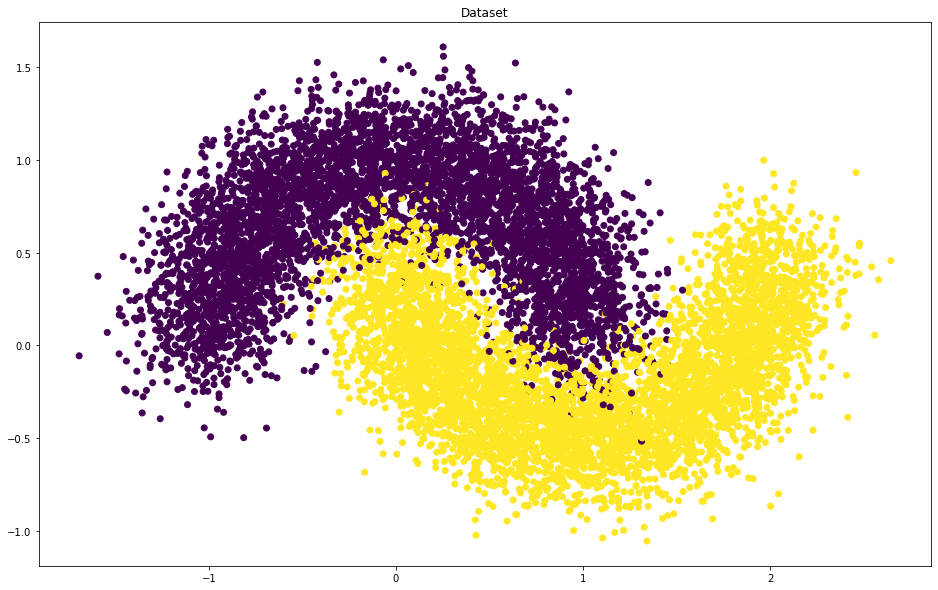

In [4]:
X, y = make_moons(n_samples=10000, random_state=42, noise=0.2)
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7)
plt.figure(figsize=(16, 10))
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.show()

## Тест 1

In [5]:
knn = KNN(k=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [6]:
calc_accuracy(y_real=y_test, y_pred=y_pred)

0.9633333333333334

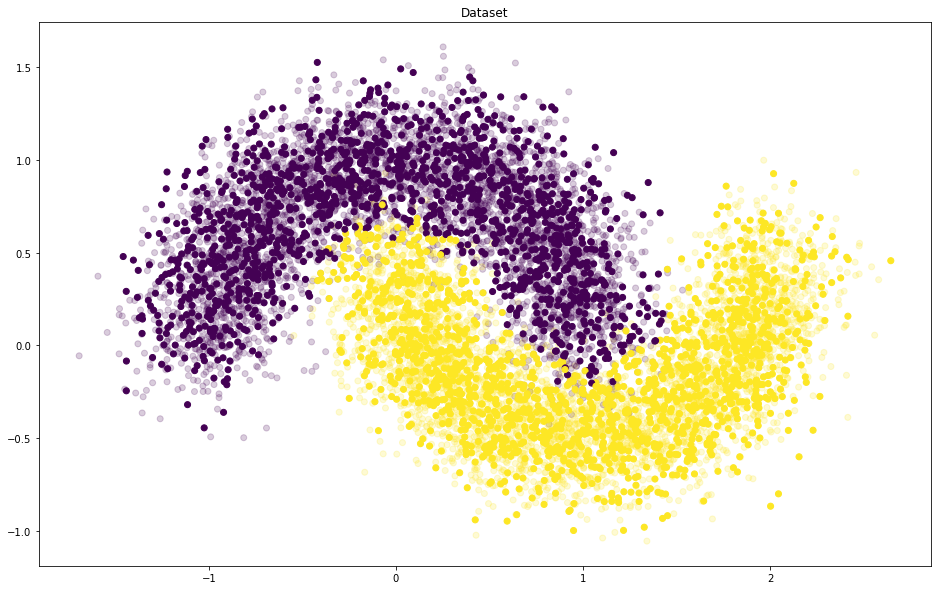

In [7]:
plt.figure(figsize=(16, 10))
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.2)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap="viridis")
plt.show()

## plot confusion matrix

In [8]:
import seaborn as sns


# for binary classification
def conf_matrix(*, y_real, y_pred):
    tp = np.sum((y_pred == 1) & (y_real == 1))
    fp = np.sum((y_pred == 1) & (y_real == 0))
    fn = np.sum((y_pred == 0) & (y_real == 1))
    tn = np.sum((y_pred == 0) & (y_real == 0))
    #print(fp)
    fig = plt.figure(figsize=(10, 8))
    ax = sns.heatmap([[tp, fp], [fn, tn]], annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

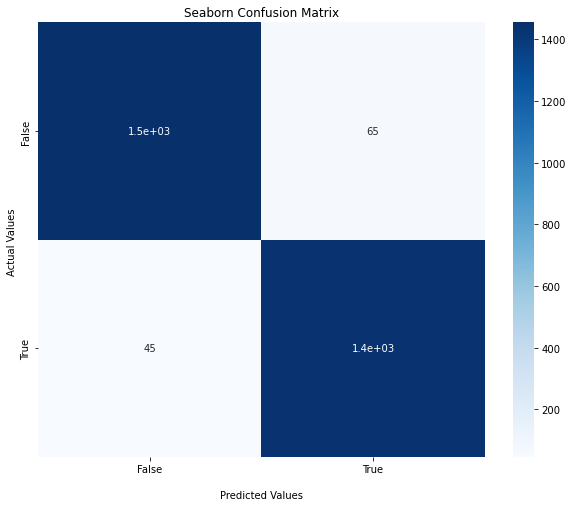

In [9]:
conf_matrix(y_real=y_test, y_pred=y_pred)